In [1]:
import os, sys
import general_config 
print(general_config.ROOTDIR)
sys.path.append(general_config.ROOTDIR)

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize, rotate

from pipeline.objgen.cells import CCell
from pipeline.objgen.ccells import CCellM, CCellP
from pipeline.objgen.tcells import CCellT,CCellTs
from pipeline.objgen.rcells import RCell

D:/Desktop@D/xai_basic


In [2]:
def create_multi_axes_figures(settings):
    fig = plt.figure()
    for axpos, img in settings:
        fig.add_subplot(*axpos)
        ax = plt.gca()
        ax.imshow(img)
        ax.set_xlim(0,512)
        ax.set_ylim(0,512)

# Basic
We generate different types of cells. Here, make_explanation() is not yet implemented.

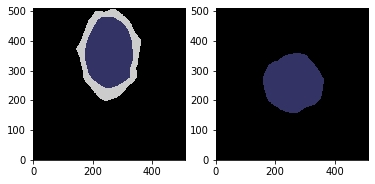

In [3]:
c = CCell()
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.4])
}
shape_setting = {
    'radius': 100,
    'vertical_stretch':1.5, # to roughly make ellipse
    'thickness': 20,
    'd_noise':5.,
    'noise_roughness': 32 # 1 is very fine, pixel level noise
}
# first cell
c.setup_basic_ball(color_setting, shape_setting)
circ, explanation = c.make_basic_ball(centerpos=(100,0))

# second cell, without border
shape_setting['thickness'] = 0
shape_setting['vertical_stretch'] = 1.
circ_without_border, _ = c.make_basic_ball(centerpos=(0,0))

fig_settings = []
fig_layout = (1,2)
fig_settings.append((fig_layout+(1,), circ))
fig_settings.append((fig_layout+(2,), circ_without_border))
create_multi_axes_figures(fig_settings)

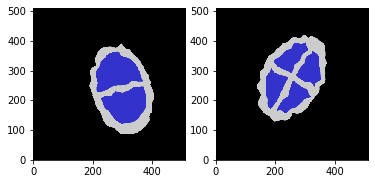

In [4]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.8]),
    'bar': np.array([0.8,0.8,0.8])
} 
shape_setting = {
    'radius': 100,
    'thickness': 20,
    'bar_thickness':20,
    'd_noise':5.,
    'noise_roughness': 20 # 1 is very fine, pixel level noise
} 
shape_setting['vertical_stretch'] = 1.5

cm = CCellM()
cm.setup_ccell(color_setting, shape_setting) 
circ, explanation = cm.make_ccell(centerpos=(-20,40),rotate_angle=np.random.uniform(-45,45))

cp = CCellP()
cp.setup_ccell(color_setting, shape_setting) 
circp, explanation = cp.make_ccell(centerpos=(20,0), rotate_angle=np.random.uniform(-45,45))

fig_settings = []
fig_layout = (1,2)
fig_settings.append((fig_layout+(1,), circ))
fig_settings.append((fig_layout+(2,), circp))
create_multi_axes_figures(fig_settings)

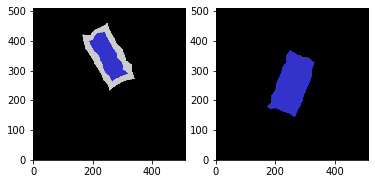

In [5]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.8])
}

shape_setting = {
    'h':200,
    'w':100,
    'thickness': 20, # border thickness
    'd_noise':5,
    'noise_roughness': 20 # 1 is very fine, pixel level noise
}
cp = RCell()
cp.setup_rectangle(color_setting, shape_setting) 
rect, explanation = cp.make_basic_rect(centerpos=(40,80), 
                                       rotate_angle=np.random.uniform(-45,45))


shape_setting['thickness'] = 0
cp.setup_rectangle(color_setting, shape_setting) 
rect2, explanation = cp.make_basic_rect(centerpos=(0,0), 
                                        rotate_angle=np.random.uniform(-45,45))

fig_settings = []
fig_layout = (1,2)
fig_settings.append((fig_layout+(1,), rect))
fig_settings.append((fig_layout+(2,), rect2))
create_multi_axes_figures(fig_settings)

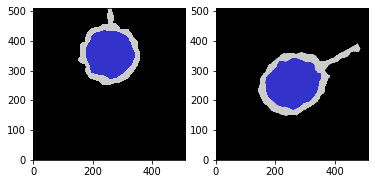

In [6]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.8]),
    'tail': np.array([0.8,0.8,0.8])
}
shape_setting = {
    'radius': 100,
    'vertical_stretch':1.0, # to roughly make ellipse
    'thickness': 20,
    'tail_thickness':20,
    'tail_ratio_to_radius':2.,
    'd_noise':5.,
    'noise_roughness': 20 # 1 is very fine, pixel level noise
}    
ct = CCellT()
ct.setup_basic_ball(color_setting, shape_setting)
ct1, explanation = ct.make_tcell(centerpos=(100,0))

shape_setting['vertical_stretch'] = 1.2
ct2, _ = ct.make_tcell(centerpos=(0,0), rotate_angle=60)

fig_settings = []
fig_layout = (1,2)
fig_settings.append((fig_layout+(1,), ct1))
fig_settings.append((fig_layout+(2,), ct2))
create_multi_axes_figures(fig_settings)

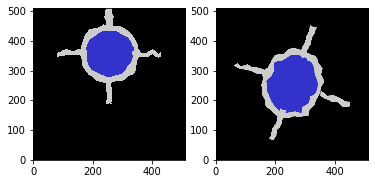

In [7]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.8]),
    'tail': np.array([0.8,0.8,0.8])
}
shape_setting = {
    'radius': 100,
    'vertical_stretch':1.0, # to roughly make ellipse
    'thickness': 20,
    'tail_thickness':20,
    'tail_angles':[0,90.,180.,270.],
    'tail_ratio_to_radius':1.5,
    'd_noise':5.,
    'noise_roughness': 20 # 1 is very fine, pixel level noise
} 
cts = CCellTs()
cts.setup_basic_ball(color_setting, shape_setting)
ct1s, explanation = cts.make_tcell(centerpos=(100,0))

shape_setting['vertical_stretch'] = 1.2
ct2s, _ = cts.make_tcell(centerpos=(0,0), rotate_angle=20)

fig_settings = []
fig_layout = (1,2)
fig_settings.append((fig_layout+(1,), ct1s))
fig_settings.append((fig_layout+(2,), ct2s))
create_multi_axes_figures(fig_settings)